# ODE examples and implicit solution with Newton Raphson

## Two ODE examples
Let's consider two examples in detail. We will solve both with the scipy package, but use a different library for each case. In the Lab you will do a third (similar) example and compare the two libraries in more detail.

### Belousov-Zhabotinsky reaction

The _Belousov-Zhabotinsky reaction_ is a chemcial oscillator, a cocktail of chemicals which, when heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to oscillate between two extremes. The following equations describe the evolution of the two concentrations in this chemical system:
$$
\frac{dx}{dt} = 1-(b+1)x+ax^2y\\
\frac{dy}{dt} = bx -ax^2y
$$
where $x$ and $y$ represent concentrations of two chemicals and $a$ and  $b$ are positive constants. 

Solve these equations (numerically) for $a=1$, $b=3$ with initial conditions $x=y=0$ and plot the solution. 

In [12]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [41]:
def bz_rhs_expl(xy,h,a=1,b=3):
    '''
    Right hand sidev of: 
    Belousov-Zhabotinsky reaction equations
    
    Parameters:
    -----------  
    xy   : concentration vector xy = (x,y)
    a,b  : constants
    h    : time step dt
          
    Return:
    -------
    xy_n : new position vector
    '''   
    x,y  = xy
    xy_n = [ 1-(b+1)*x+a*x**2*y , b*x -a*x**2*y ]
    return xy_n

xy0 = [0,1]      # initial conditions

t = np.arange(0,50,0.01)  

a,b = (2,4)      # set parameters   
xy = odeint(bz_rhs_expl, xy0, t, args=(a,b))

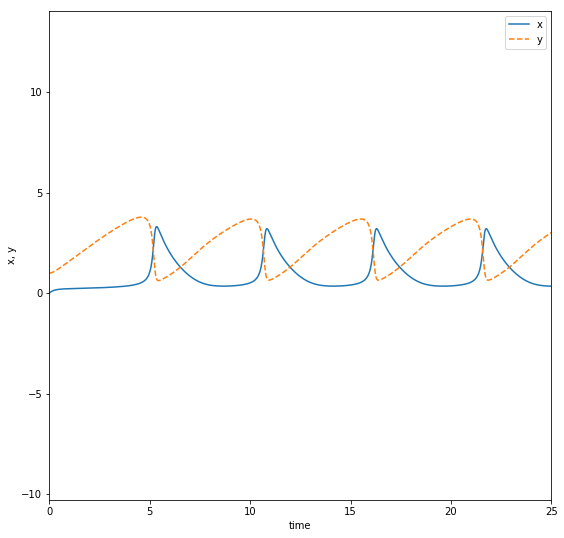

In [42]:
plt.figure(figsize=(9,9)) ## changes figure size

plt.plot(t,xy.T[0],label='x') ## data set one
plt.plot(t,xy.T[1],'--',label='y') ## data set 2

plt.axis('equal') ## forces the same scale to be used on both axes
plt.xlim((0,25)) ## Sets the x-axis interval to [0,25] (double inclusive)

plt.xlabel('time'); plt.ylabel('x, y');  ## Labels for the axes

plt.legend() ## uses the "label"`s from the plot calls.

plt.savefig('plot.png')  ## saves the plot in the file "plot.png"
plt.show()  ## removes any output and just shows the plot.

### The Lorenz equations

One of the most celebrated sets of differential equations in physics is the [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system):
$$ \frac{dx}{dt} = \sigma(y-x) $$ $$\frac{dy}{dt} = rx -y -xz$$ $$\frac{dz}{dt} = xy - bz$$ where $\sigma$, $r$ and $b$ are constants. (The names of these constants may seem arbirtrary and odd but are always used in these equations -- _for historical reasons_).

We will use the range from $t = 0$ to $t = 50 $ with the intial condition $(x,y,z) = (1,1,1)$, and solve with parameters $\sigma=10.0$, $r=28$ and $b=8/3$.

Let's use and explore once more `integrate.solve_ivp`.

In [48]:
def lorenz_rhs_ode(t,yy,params):
    import numpy as np
    '''
    Righ-hand-side of:
    Lorenz equations
    
    Parameters:
    -----------
    t : float
      time 
    
    yy : array,float
      position vector, three components
      
    params : tuple, floats
      (s,r,b) sigma, r, b parameters
    
    Return: 
    -------
    rhs : list, floats 
      RHS new position vector
    '''
    s,r,b = params
    x,y,z = yy
    rhs = np.array([ s*(y-x), r*x -y -x*z, x*y - b*z])
    return rhs

In [49]:
# set the parameters for this solution
s = 10.0; r = 28; b = 8./3
params = (s,r,b)
tmin,tmax = (0,50)

As it turns out there is one caveat with `integrate.solve_ivp`, which is how it deals with arguments to the RHS. It does not have a built-in way to do this. 

Another point to note is that this library will automatically pick the time step size, which in this case is too large to make good plots. 

Let's explore this.

In [50]:
import numpy as np
t_eval = np.linspace(tmin,tmax,10000)
fun = lambda t,y : lorenz_rhs_ode(t,y,params)
a0  = np.array([1,1,1])
sol = integrate.solve_ivp(fun,[tmin,tmax],a0, t_eval = t_eval)

In [12]:
#sol?

#### Time evolution of the first component

Text(0, 0.5, 'x coordinate')

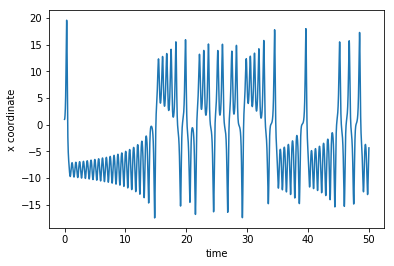

In [53]:
from matplotlib.pyplot import plot,xlabel,ylabel
plot(sol.t,sol.y[0])
xlabel('time'); ylabel("x coordinate")

#### Plot of x vs y component

Text(0, 0.5, 'x coordinate')

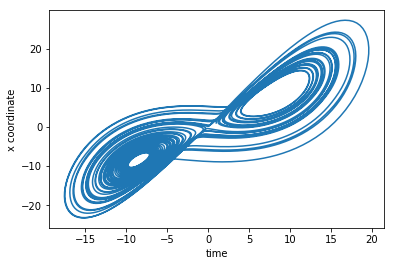

In [54]:

plot(sol.y[0],sol.y[1])
xlabel('time'); ylabel("x coordinate")

#### Last but not least, let's do a 3D plot of the 3D trajectory.

In [15]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

In [16]:
#help(Axes3D)

In [17]:
ifig=19;close(ifig);fig = plt.figure(ifig)
ax = fig.gca(projection='3d',azim=-30, elev=45)
ax.plot(sol.y[0],sol.y[1],sol.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
title('s = %4.1f ; r = %4.1f; b = %4.1f)'%(s,r,b))
show()

FigureCanvasNbAgg()